# Clustering Crypto

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Initial imports
import requests
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
#import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

### Fetching Cryptocurrency Data

In [3]:
# Alternatively, use the provided csv file:
file_path = Path("/content/drive/MyDrive/Colab Notebooks/ClassWork/13-AWS/Assignment/Instructions/Starter_Files/Resources/crypto_data.csv")

# Create a DataFrame
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
crypto_df.shape

(1252, 6)

### Data Preprocessing

In [4]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
#crypto_df = crypto_df.drop(columns='Unnamed: 0')
#crypto_df.shape

In [6]:
# Keep only cryptocurrencies that are trading
crypto_df = crypto_df[crypto_df['IsTrading']==True]
crypto_df.shape

(1144, 6)

In [66]:
%load_ext google.colab.data_table


In [ ]:
# Keep only cryptocurrencies with a working algorithm


In [7]:
# Remove the "IsTrading" column
crypto_df =crypto_df.drop(columns='IsTrading')
crypto_df.shape

(1144, 5)

In [8]:
print('TotalCoinsMined equal to Zero',(crypto_df['TotalCoinsMined'] == 0).sum(axis=0))
print('TotalCoinsMined that are nulls',(crypto_df['TotalCoinsMined']).isna().sum(axis=0))

TotalCoinsMined equal to Zero 152
TotalCoinsMined that are nulls 459


In [9]:
# Remove rows with at least 1 null value
crypto_df = crypto_df.dropna(how='any',axis=0)
crypto_df.shape 

(685, 5)

In [10]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df = crypto_df[crypto_df.TotalCoinsMined != 0]
crypto_df.shape

(533, 5)

In [11]:
# Drop rows where there are 'N/A' text values
crypto_df.eq('N/A').any()
# Does not appear to be any "N/A" values that are text

CoinName           False
Algorithm          False
ProofType          False
TotalCoinsMined    False
TotalCoinSupply    False
dtype: bool

In [20]:
%unload_ext google.colab.data_table

In [12]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coins_name = pd.DataFrame(data= crypto_df['CoinName'], index=crypto_df.index)


In [13]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df =crypto_df.drop(columns='CoinName')
crypto_df.shape

(533, 4)

In [14]:
# Create dummy variables for text features
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X.shape

(533, 100)

In [22]:
# Standardize data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pd.DataFrame(X_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.116748,-0.152865,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,-0.043355,-0.043355,-0.192263,-0.061372,-0.097312,-0.043355,-0.11536,-0.075235,-0.043355,-0.043355,-0.151765,-0.043355,-0.131056,-0.043355,-0.043355,-0.086957,-0.043355,-0.043355,-0.043355,-0.043355,-0.061372,-0.043355,-0.086957,-0.086957,-0.086957,-0.043355,-0.131056,-0.138277,-0.138277,-0.043355,...,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.398366,-0.043355,-0.18151,-0.043355,-0.086957,-0.086957,-0.106701,-0.043355,-0.043355,-0.131056,-0.043355,-0.043355,-0.043355,-0.043355,-0.075235,-0.438627,-0.043355,-0.061372,-0.043355,-0.043355,-0.894805,-0.043355,-0.043355,1.424222,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
1,-0.093589,-0.144996,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,-0.043355,-0.043355,-0.192263,-0.061372,-0.097312,-0.043355,-0.11536,-0.075235,-0.043355,-0.043355,-0.151765,-0.043355,-0.131056,-0.043355,-0.043355,-0.086957,-0.043355,-0.043355,-0.043355,-0.043355,-0.061372,-0.043355,-0.086957,-0.086957,-0.086957,-0.043355,-0.131056,-0.138277,-0.138277,-0.043355,...,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.398366,-0.043355,-0.18151,-0.043355,-0.086957,-0.086957,-0.106701,-0.043355,-0.043355,-0.131056,-0.043355,-0.043355,-0.043355,-0.043355,-0.075235,-0.438627,-0.043355,-0.061372,-0.043355,-0.043355,-0.894805,-0.043355,-0.043355,1.424222,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
2,0.525872,4.493764,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,-0.043355,-0.043355,-0.192263,-0.061372,-0.097312,-0.043355,-0.11536,-0.075235,-0.043355,-0.043355,-0.151765,-0.043355,-0.131056,-0.043355,-0.043355,-0.086957,-0.043355,-0.043355,-0.043355,-0.043355,-0.061372,-0.043355,-0.086957,-0.086957,-0.086957,-0.043355,-0.131056,-0.138277,-0.138277,-0.043355,...,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.398366,-0.043355,5.50935,-0.043355,-0.086957,-0.086957,-0.106701,-0.043355,-0.043355,-0.131056,-0.043355,-0.043355,-0.043355,-0.043355,-0.075235,-0.438627,-0.043355,-0.061372,-0.043355,-0.043355,-0.894805,-0.043355,-0.043355,1.424222,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
3,-0.116354,-0.152554,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,-0.043355,-0.043355,-0.192263,-0.061372,-0.097312,-0.043355,-0.11536,-0.075235,-0.043355,-0.043355,-0.151765,-0.043355,-0.131056,-0.043355,-0.043355,-0.086957,-0.043355,-0.043355,-0.043355,-0.043355,-0.061372,-0.043355,-0.086957,-0.086957,-0.086957,-0.043355,-0.131056,-0.138277,-0.138277,-0.043355,...,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.398366,-0.043355,-0.18151,-0.043355,-0.086957,-0.086957,-0.106701,-0.043355,-0.043355,-0.131056,-0.043355,-0.043355,-0.043355,-0.043355,-0.075235,-0.438627,-0.043355,-0.061372,-0.043355,-0.043355,1.117562,-0.043355,-0.043355,-0.702138,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
4,-0.114384,-0.152865,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,-0.043355,-0.043355,-0.192263,-0.061372,-0.097312,-0.043355,-0.11536,-0.075235,-0.043355,-0.043355,-0.151765,-0.043355,7.630349,-0.043355,-0.043355,-0.086957,-0.043355,-0.043355,-0.043355,-0.043355,-0.061372,-0.043355,-0.086957,-0.086957,-0.086957,-0.043355,-0.131056,-0.138277,-0.138277,-0.043355,...,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.398366,-0.043355,-0.18151,-0.043355,-0.086957,-0.086957,-0.106701,-0.043355,-0.

### Reducing Dimensions Using PCA

In [25]:
# Use PCA to reduce dimensions to 3 principal components
# Initialize PCA model
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.fit_transform(X_scaled)
pd.DataFrame(data = X_pca, index=crypto_df.index).head(10)

,0,1,2
42,-0.336779,1.146363,-0.591251
404,-0.320081,1.146897,-0.591686
1337,2.309826,1.760164,-0.707251
BTC,-0.146898,-1.367865,0.165079
ETH,-0.151054,-2.082231,0.488866
LTC,-0.169433,-1.033865,0.013110
DASH,-0.389323,1.234414,-0.567563
XMR,-0.155283,-2.280442,0.412910
ETC,-0.149493,-2.082284,0.488855
ZEC,-0.153580,-2.127154,0.283343


In [26]:
# Create a DataFrame with the principal components data
pcs_df = pd.DataFrame( 
    data=X_pca, index = crypto_df.index,
    columns=["PC 1", "PC 2", "PC 3"]
   )

In [27]:
pcs_df.head()

,PC 1,PC 2,PC 3
42,-0.336779,1.146363,-0.591251
404,-0.320081,1.146897,-0.591686
1337,2.309826,1.760164,-0.707251
BTC,-0.146898,-1.367865,0.165079
ETH,-0.151054,-2.082231,0.488866


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

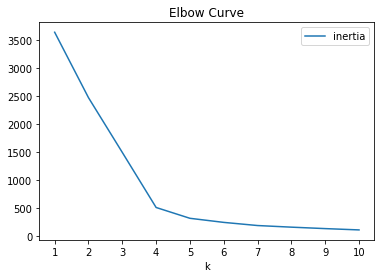

In [28]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values 
# Using pcs_df created above
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot  
# hvPlot does not run in Colab.  Using standard plot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

Running K-Means with `k=<your best value for k here>`

In [31]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)
# Fit the model
model.fit(pcs_df)
# Predict clusters
predictions = model.predict(pcs_df)



In [32]:
# Add the predicted class columns
pcs_df["class"] = model.labels_
pcs_df

,PC 1,PC 2,PC 3,class
42,-0.336779,1.146363,-0.591251,1
404,-0.320081,1.146897,-0.591686,1
1337,2.309826,1.760164,-0.707251,1
BTC,-0.146898,-1.367865,0.165079,0
ETH,-0.151054,-2.082231,0.488866,0
...,...,...,...,...
ZEPH,2.459723,0.403893,-0.097756,1
GAP,-0.334820,1.146305,-0.591267,1
BDX,0.325469,-2.305170,0.463343,0
ZEN,-0.153581,-2.127154,0.283343,0


In [39]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features
 
clustered_df = pd.concat([crypto_df, pcs_df, coins_name], axis=1, join='inner')
clustered_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.336779,1.146363,-0.591251,1,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.320081,1.146897,-0.591686,1,404Coin
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.309826,1.760164,-0.707251,1,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.146898,-1.367865,0.165079,0,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0,-0.151054,-2.082231,0.488866,0,Ethereum
...,...,...,...,...,...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,2.459723,0.403893,-0.097756,1,ZEPHYR
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.334820,1.146305,-0.591267,1,Gapcoin
BDX,CryptoNight,PoW,9.802226e+08,1400222610,0.325469,-2.305170,0.463343,0,Beldex
ZEN,Equihash,PoW,7.296538e+06,21000000,-0.153581,-2.127154,0.283343,0,Horizen


### Visualizing Results

#### 3D-Scatter with Clusters

In [40]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 3",
    y="PC 2",
    z="PC 1",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


#### Table of Tradable Cryptocurrencies

In [ ]:
# Table with tradable cryptos
!pip install hvplot
import hvplot.pandas


In [57]:
# hvplot has issues running in Colab, this should run in Jupyter NB
clustered_df.hvplot.table(columns=["CoinName", "Algorithm",
                                   "ProofType", "TotalCoinSupply", 
                                  "TotalCoinsMined", "class"], sortable=True, selectable=True)


:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

In [89]:
# Print the total number of tradable cryptocurrencies
print('The total number of tradable cryptocurrencies is', clustered_df['CoinName'].nunique())

The total number of tradable cryptocurrencies is 532


#### Scatter Plot with Tradable Cryptocurrencies

In [78]:
# Scale data to create the scatter plot
plotting_df = clustered_df[['TotalCoinsMined', 'TotalCoinSupply']]
scaler = MinMaxScaler()
plotting_df = pd.DataFrame(scaler.fit_transform(plotting_df), columns=plotting_df.columns)

In [82]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
import plotly.express as px
fig = px.scatter(plotting_df, x='TotalCoinsMined', y='TotalCoinSupply')
fig.show()